In [ ]:
''''
XGBoost implementation:

When you use XGBClassifier or XGBRegressor and call .fit(X, y), XGBoost internally calculates the residuals/gradients for each boosting round and trains the next tree accordingly.

You just need to specify parameters like n_estimators (number of trees), learning_rate, max_depth, etc.

So you don’t manually compute residuals or train each tree. XGBoost does all of that under the hood.
'''

In [15]:
from xgboost import XGBClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [16]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=.2, random_state=42)

In [17]:
# create model instance
model = XGBClassifier(
    n_estimators=2,        # number of trees
    max_depth=2,
    learning_rate=1,
    objective='multi:softmax',   # since Iris has 3 classes
    num_class=3
)

In [18]:
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [19]:
score = accuracy_score(y_test, preds)
print("Model Accuracy:", score)

Model Accuracy: 1.0


<Figure size 800x500 with 0 Axes>

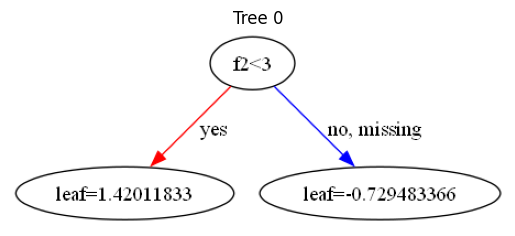

<Figure size 800x500 with 0 Axes>

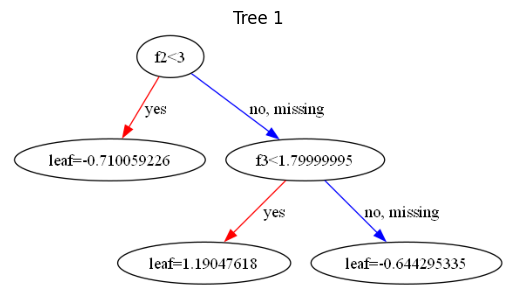

In [20]:
# Plot the trees
for i in range(model.n_estimators):
    plt.figure(figsize=(8, 5))
    plot_tree(model, num_trees=i)
    plt.title(f"Tree {i}")
    plt.show()